In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv("/content/drive/MyDrive/Intellipaat/Datasets/shopping_trends_updated.csv",na_values="?")
data.head(1)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly


In [3]:
data.rename(columns={'Customer ID':'Cust_id','Item Purchased':'Item','Purchase Amount (USD)':'Pur_Amount','Review rating':'Rating',
                     'Subscription Status':'Subscription?','Shipping Type':'Shipping_Type','Discount Applied':'Discount',
                     'Promo Code Used':'Promo_Used?','Previous Purchases':'Purchased_Before?','Payment Method':'Payment_Mode',
                     'Frequency of Purchases':'Frequency'},inplace=True)

In [4]:
data.head()

,Cust_id,Age,Gender,Item,Category,Pur_Amount,Location,Size,Color,Season,Review Rating,Subscription?,Shipping_Type,Discount,Promo_Used?,Purchased_Before?,Payment_Mode,Frequency
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cust_id            3900 non-null   int64  
 1   Age                3900 non-null   int64  
 2   Gender             3900 non-null   object 
 3   Item               3900 non-null   object 
 4   Category           3900 non-null   object 
 5   Pur_Amount         3900 non-null   int64  
 6   Location           3900 non-null   object 
 7   Size               3900 non-null   object 
 8   Color              3900 non-null   object 
 9   Season             3900 non-null   object 
 10  Review Rating      3900 non-null   float64
 11  Subscription?      3900 non-null   object 
 12  Shipping_Type      3900 non-null   object 
 13  Discount           3900 non-null   object 
 14  Promo_Used?        3900 non-null   object 
 15  Purchased_Before?  3900 non-null   int64  
 16  Payment_Mode       3900 

In [6]:
data.isnull().sum()

,0
Cust_id,0
Age,0
Gender,0
Item,0
Category,0
Pur_Amount,0
Location,0
Size,0
Color,0
Season,0


In [7]:
Gender_Category=data.groupby(['Gender','Category'])['Pur_Amount'].sum().reset_index().rename(columns={'Pur_Amount':'Total Purchase Value'})

print(Gender_Category)


   Gender     Category  Total Purchase Value
0  Female  Accessories                 23819
1  Female     Clothing                 33636
2  Female     Footwear                 11835
3  Female    Outerwear                  5901
4    Male  Accessories                 50381
5    Male     Clothing                 70628
6    Male     Footwear                 24258
7    Male    Outerwear                 12623


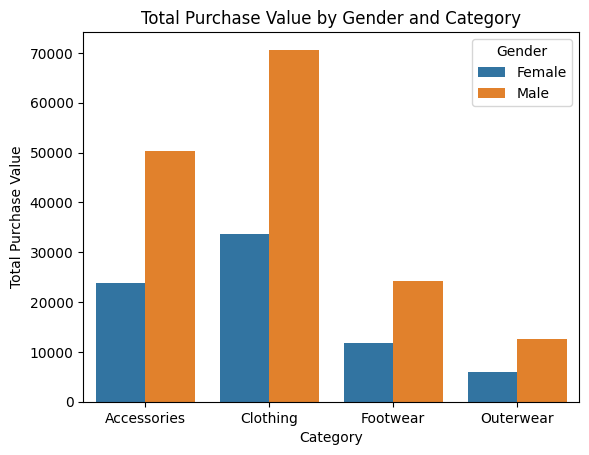

In [8]:
sns.barplot(x='Category', y='Total Purchase Value', hue='Gender', data=Gender_Category)
plt.title('Total Purchase Value by Gender and Category')
plt.xlabel('Category')
plt.ylabel('Total Purchase Value')
plt.show()

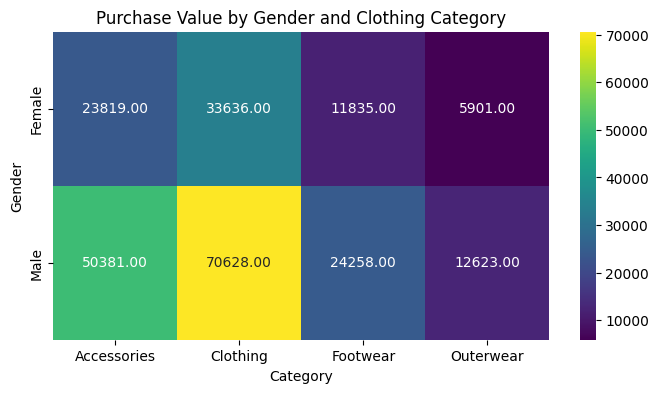

In [9]:
heatmap_viz = Gender_Category.pivot_table(index='Gender', columns='Category', values='Total Purchase Value')

plt.figure(figsize=(8, 4))
# Create the heatmap
sns.heatmap(heatmap_viz, annot=True, cmap='viridis',fmt=".2f")
plt.title('Purchase Value by Gender and Clothing Category')


plt.show()

In [10]:
#result = data[data['Age'] == 55]
#result.head(5)


**Publishing Top 10 customers as per thier previous purchase record**

In [11]:
Sort_data = data.sort_values(by='Purchased_Before?', ascending=False)
Sort_data.head(10)

,Cust_id,Age,Gender,Item,Category,Pur_Amount,Location,Size,Color,Season,Review Rating,Subscription?,Shipping_Type,Discount,Promo_Used?,Purchased_Before?,Payment_Mode,Frequency
3261,3262,48,Female,Belt,Accessories,52,Rhode Island,L,Cyan,Winter,3.4,No,Store Pickup,No,No,50,Debit Card,Weekly
633,634,66,Male,Sandals,Footwear,33,Minnesota,M,Orange,Spring,2.9,Yes,Express,Yes,Yes,50,Debit Card,Quarterly
2262,2263,53,Male,Backpack,Accessories,22,Arizona,M,Green,Winter,3.1,No,2-Day Shipping,No,No,50,PayPal,Monthly
2264,2265,51,Male,Hat,Accessories,92,North Dakota,M,Turquoise,Summer,3.9,No,2-Day Shipping,No,No,50,PayPal,Monthly
124,125,44,Male,Sweater,Clothing,86,Nevada,M,Gray,Spring,3.1,Yes,Next Day Air,Yes,Yes,50,PayPal,Annually
665,666,41,Male,Pants,Clothing,55,New Mexico,M,Peach,Spring,4.9,Yes,2-Day Shipping,Yes,Yes,50,Credit Card,Annually
3581,3582,26,Female,Dress,Clothing,95,Georgia,M,Orange,Fall,4.9,No,Next Day Air,No,No,50,Credit Card,Weekly
2099,2100,31,Male,T-shirt,Clothing,78,Oklahoma,L,Green,Summer,2.9,No,Express,No,No,50,PayPal,Annually
313,314,42,Male,Dress,Clothing,77,Vermont,M,Pink,Spring,3.7,Yes,Express,Yes,Yes,50,Credit Card,Every 3 Months
3205,3206,40,Female,Hoodie,Clothing,24,Colorado,XL,Magenta,Fall,4.4,No,2-Day Shipping,No,No,50,Bank Transfer,Every 3 Months


***Creating Age Group to analyse purchase trends***


In [12]:
def Group(Age):
    if Age <=20:
      return '0-20'
    elif Age <=30:
      return '21-30'
    elif Age <=40:
      return '31-40'
    elif Age <=50:
      return '41-50'
    elif Age <=60:
      return '51-60'
    elif Age <=70:
      return '61-70'
    elif Age <=80:
      return '71-80'
    else:
      return '80+'


In [13]:
#data['Age_Group'] = data['Age'].apply(Group)

data.insert(data.columns.get_loc('Age') + 1, 'Age_Group', data['Age'].apply(Group))
data.head(10)

,Cust_id,Age,Age_Group,Gender,Item,Category,Pur_Amount,Location,Size,Color,Season,Review Rating,Subscription?,Shipping_Type,Discount,Promo_Used?,Purchased_Before?,Payment_Mode,Frequency
0,1,55,51-60,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,0-20,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,41-50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,21-30,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,41-50,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,41-50,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,61-70,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,21-30,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,21-30,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,51-60,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


In [14]:
Age_Purchase = data.groupby('Age_Group')['Pur_Amount'].sum().reset_index()
Age_Purchase

,Age_Group,Pur_Amount
0,0-20,12504
1,21-30,44775
2,31-40,43193
3,41-50,44129
4,51-60,45316
5,61-70,43164


In [15]:
#plt.pie(Age_Purchase['Pur_Amount'], labels=Age_Purchase['Age_Group'], autopct='%1.1f%%')

# Add a title
#plt.title('Distribution of "Total Purchase Value" by "Age"')

# Show the chart
#plt.show()

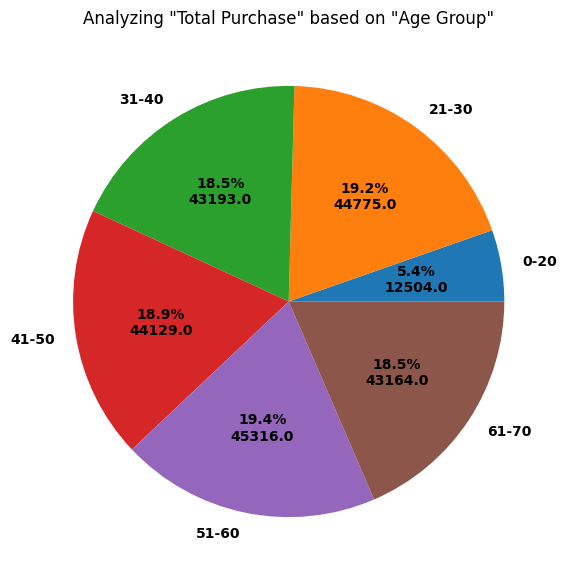

In [16]:
# Create subplots
fig, axes = plt.subplots(figsize=(8, 7))

# Plot category-wise sales with total and percentage
def label_func(pct, data):
    total = sum(data)
    value = round(pct/100 * total, 2)
    return f"{pct:.1f}%\n{value}"

axes.pie(Age_Purchase['Pur_Amount'], labels=Age_Purchase['Age_Group'],
         autopct=lambda pct: label_func(pct, Age_Purchase['Pur_Amount']), textprops={'weight': 'bold'})
axes.set_title('Analyzing "Total Purchase" based on "Age Group"')

plt.show()

In [17]:
data.head()

,Cust_id,Age,Age_Group,Gender,Item,Category,Pur_Amount,Location,Size,Color,Season,Review Rating,Subscription?,Shipping_Type,Discount,Promo_Used?,Purchased_Before?,Payment_Mode,Frequency
0,1,55,51-60,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,0-20,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,41-50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,21-30,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,41-50,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
